# Banking customer churn

In [11]:
# Importing the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Data Loading
bank_df = pd.read_csv("Customer-Churn-Records.csv")

In [12]:
bank_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


# Data Exploration

In [13]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

# Checking null values

In [15]:
bank_df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

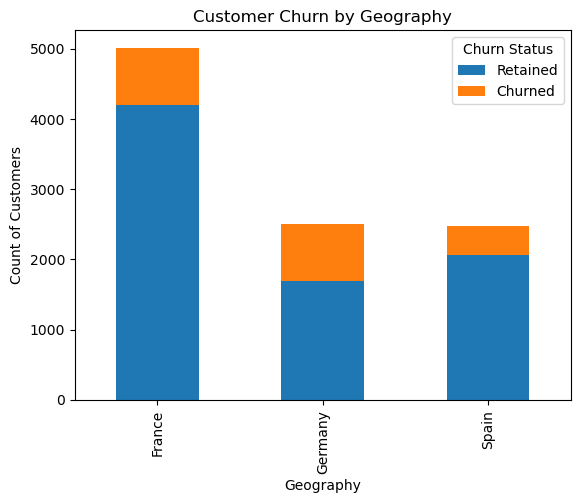

In [16]:
# Function to plot a bar chart showing the number of churned and retained customers by geography
def plot_churn_by_geography():
    """
    Bar chart of customer churn by geography.
    """
    churn_geo = bank_df.groupby(['Geography', 'Exited']).size().unstack()
    churn_geo.plot(kind='bar', stacked=True)
    plt.title("Customer Churn by Geography")
    plt.xlabel("Geography")
    plt.ylabel("Count of Customers")
    plt.legend(['Retained', 'Churned'], title="Churn Status")
    plt.show()

plot_churn_by_geography()

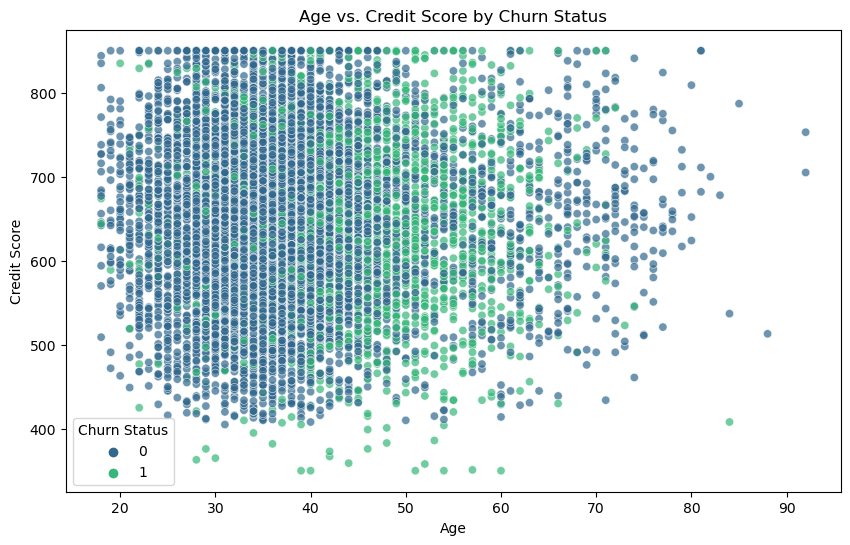

In [18]:
# Function to plot a scatter plot for Age vs. Credit Score colored by churn status
def plot_age_credit_score_scatter():
    """
    Scatter plot of Age vs. Credit Score colored by Churn Status.
    """
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x="Age", y="CreditScore", hue="Exited", data=bank_df, palette="viridis", alpha=0.7)
    plt.title("Age vs. Credit Score by Churn Status")
    plt.xlabel("Age")
    plt.ylabel("Credit Score")
    plt.legend(title="Churn Status")
    plt.show()

plot_age_credit_score_scatter()

# Data Preprocessing


In [19]:
# Dropping unnecessary columns (e.g., 'RowNumber', 'CustomerId', 'Surname' may not be useful for prediction)
bank_df = bank_df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [20]:
# Encoding categorical variables (Geography, Gender, Card Type)
label_enc = LabelEncoder()
bank_df['Gender'] = label_enc.fit_transform(bank_df['Gender'])
bank_df['Geography'] = label_enc.fit_transform(bank_df['Geography'])
bank_df['Card Type'] = label_enc.fit_transform(bank_df['Card Type'])

In [21]:
# Feature Scaling (for continuous variables)
scaler = StandardScaler()
bank_df[['CreditScore', 'Balance', 'EstimatedSalary', 'Point Earned']] = scaler.fit_transform(bank_df[['CreditScore', 'Balance', 'EstimatedSalary', 'Point Earned']])

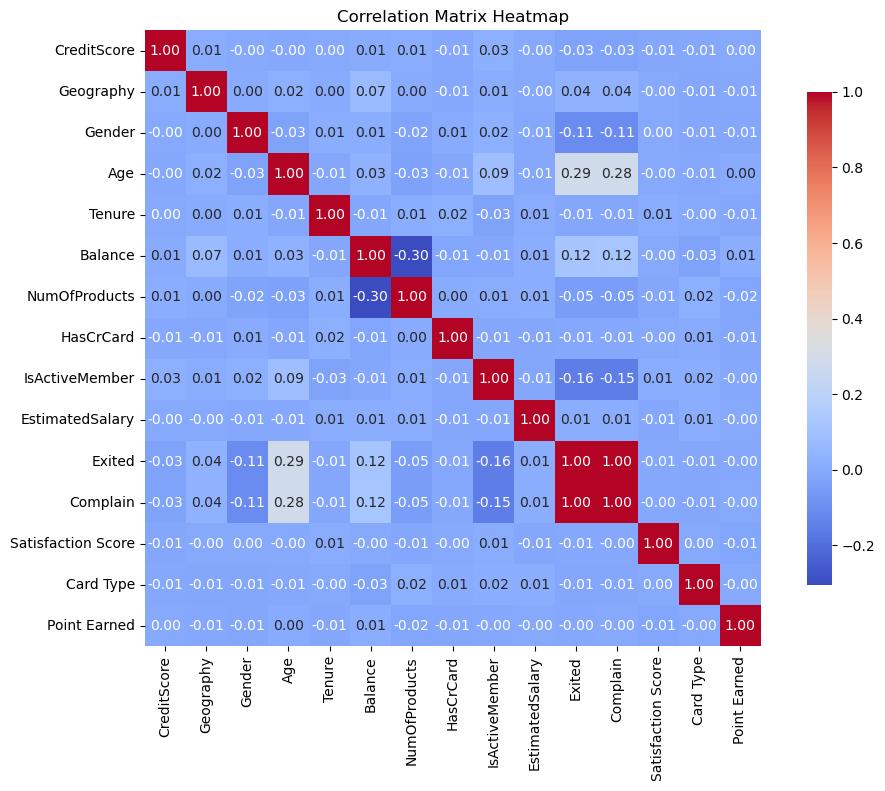

In [23]:
# Function to plot a heatmap of the correlation matrix
def plot_correlation_heatmap():
    """
    Heatmap of the correlation matrix.
    """
    plt.figure(figsize=(12, 8))
    sns.heatmap(bank_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": 0.8})
    plt.title("Correlation Matrix Heatmap")
    plt.show()

plot_correlation_heatmap()

In [24]:
# Function to calculate and display descriptive statistics for key metrics
def display_statistics():
    """
    Displays basic descriptive statistics for specific columns.
    """
    stats = bank_df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']].describe()
    skewness = bank_df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']].skew()
    kurtosis = bank_df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']].kurt()
    
    print("Basic Descriptive Statistics:\n", stats)
    print("\nSkewness:\n", skewness)
    print("\nKurtosis:\n", kurtosis)

display_statistics()

Basic Descriptive Statistics:
         CreditScore           Age       Balance  EstimatedSalary
count  1.000000e+04  10000.000000  1.000000e+04     1.000000e+04
mean  -4.824585e-16     38.921800 -6.252776e-17    -2.877698e-17
std    1.000050e+00     10.487806  1.000050e+00     1.000050e+00
min   -3.109504e+00     18.000000 -1.225848e+00    -1.740268e+00
25%   -6.883586e-01     32.000000 -1.225848e+00    -8.535935e-01
50%    1.522218e-02     37.000000  3.319639e-01     1.802807e-03
75%    6.981094e-01     44.000000  8.199205e-01     8.572431e-01
max    2.063884e+00     92.000000  2.795323e+00     1.737200e+00

Skewness:
 CreditScore       -0.071607
Age                1.011320
Balance           -0.141109
EstimatedSalary    0.002085
dtype: float64

Kurtosis:
 CreditScore       -0.425726
Age                1.395347
Balance           -1.489412
EstimatedSalary   -1.181518
dtype: float64


In [25]:
bank_df.corr()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
CreditScore,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.026771,-0.027048,-0.012599,-0.006936,0.000077
Geography,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035712,0.035830,-0.001718,-0.013462,-0.008479
Gender,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106267,-0.106287,0.000242,-0.008726,-0.013225
Age,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285296,0.283530,-0.000876,-0.006997,0.002222
Tenure,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.013656,-0.013047,0.008663,-0.001414,-0.010196
Balance,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118577,0.119124,-0.002588,-0.027059,0.014608
NumOfProducts,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047611,-0.046357,-0.011394,0.020387,-0.015330
HasCrCard,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.006976,-0.007095,-0.000212,0.005809,-0.011041
IsActiveMember,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156356,-0.154741,0.010236,0.016247,-0.004983
EstimatedSalary,-0.001384,-0.001369,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012490,0.012494,-0.013747,0.014295,-0.001515
